In [571]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:f}'.format

In [572]:
from scipy.stats import gaussian_kde, trimboth, trim1
from scipy.stats import rv_continuous
from scipy.stats import expon, norminvgauss, norm, cauchy, gennorm, exponpow

In [573]:
import scipy.stats
from scipy.stats import kstest, probplot, cramervonmises
import multiprocessing
import warnings
import signal

In [574]:
def inheritors(klass):
    subclasses = set()
    work = [klass]
    while work:
        parent = work.pop()
        for child in parent.__subclasses__():
            name = child.__name__
            if name not in subclasses:
                subclasses.add(name)
                work.append(child)
    return subclasses
result = list(sorted(map(str, inheritors(rv_continuous))))
dist_names = [x[:-4] for x in result]

In [575]:
def find_distribution(d: np.array, timeout=50):
    warnings.filterwarnings('ignore')
    run = [False]
    start = 0

    def signal_handler(signum, frame):
        if run:
            raise RuntimeError("Timed out!")

    signal.signal(signal.SIGALRM, signal_handler)

    for dist_name in dist_names[start:]:
        try:
            dist = getattr(scipy.stats, dist_name)
        except:
            print("Not found: ", dist_name)
            continue
        try:
            signal.alarm(timeout)
            run[0] = True
            p = dist.fit(d)
        except RuntimeError as e:
            print("Timeout: ", dist_name)
            continue
        except Exception as e:
            print("Error: ", dist_name, e)
            continue
        finally:
            run[0] = False
            signal.alarm(0)
        res = kstest(d, dist(*p).cdf)
        if res.pvalue > 0.0:
            print(dist_name, "pvalue=", res.pvalue, p)
        else:
            print(dist_name, "fail", res.pvalue)

In [576]:
full_df = pd.read_csv('telecom_customer.csv')
full_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,0.000000,Z,U,U,U,U,U,Y,240.000000,1000002
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,N,U,Y,U,U,U,Y,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,U,Y,U,U,U,U,Y,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,Y,U,Y,773.000000,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,N,U,U,Y,Y,Y,Y,835.000000,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,U,Y,Y,U,U,U,N,433.000000,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,U,U,N,75.000000,1099999


In [577]:
df = full_df.dropna()
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,...,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000
mean,55.376047,450.066734,45.003869,0.813560,36.023390,11.631804,11.426203,0.203043,1.188133,-12.451774,...,1.575211,0.346227,0.151245,6.354578,2.724658,6.028347,1.557162,0.092230,392.428946,1046719.733046
std,41.238244,471.538127,23.808488,1.963560,88.421331,27.175665,26.936827,2.015606,7.017669,218.369774,...,0.906859,0.475776,0.358294,4.661053,1.315672,2.102735,0.615148,0.289356,237.348045,28115.431954
min,0.582500,0.000000,-1.422500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2867.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1000001.000000
25%,31.882500,134.250000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-73.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,5.000000,1.000000,0.000000,228.000000,1022604.000000
50%,44.335000,305.500000,42.490000,0.000000,1.000000,0.390000,0.000000,0.000000,0.000000,-5.000000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,351.000000,1045265.000000
75%,65.697500,601.500000,58.000000,0.742500,33.500000,11.200000,10.937500,0.000000,0.292500,54.500000,...,2.000000,1.000000,0.000000,10.000000,3.000000,7.000000,2.000000,0.000000,535.000000,1071026.000000
max,672.015000,6103.750000,349.572500,72.765000,2018.000000,528.600000,528.600000,113.880000,476.812500,4480.000000,...,11.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1406.000000,1099977.000000


In [578]:
print(df.columns)

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [579]:
def prepare_data(df: pd.DataFrame,
                 feature: str, 
                 left_quanlile: float = 0.001, 
                 right_quanlile: float = 0.001) -> np.array:
    data = df[feature].to_numpy()
    data = trim1(data, left_quanlile, 'left')
    data = trim1(data, right_quanlile, 'right')
    return data

In [580]:
# from scipy.stats import gaussian_kde, trimboth, trim1

# for feature in full_df.columns:
#     print(feature)
    
#     data = prepare_data(df, feature)
#     plt.figure(figsize = (20,5))
#     plt.hist(data, bins=500)
#     plt.show()

In [581]:
def count_bins(data):
    n = len(np.unique(data))
    bins = int(np.ceil(1 + 3.32 * np.log(n)))
    return bins

In [582]:
import seaborn as sns

def describe_data(data: np.array, bins=None):
    print(pd.DataFrame(data).describe())
    
    sns.set(font_scale=2, style='whitegrid')
    if bins is None:
        bins = count_bins(data)

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)}, 
                                        figsize = (40, 20))

    sns.boxplot(data, ax=ax_box)
    sns.histplot(data, ax=ax_hist, bins=bins)
    
    ax_box.set(xlabel='')
    plt.show()

In [583]:
from scipy.stats import rv_continuous

class multi_modal_gen(rv_continuous):

    def _prep_params(self, *args):
        params = list(*args)
        if len(np.array(params).shape) == 1:
            params.append(1 - sum(params[2::3]))
            return np.array(params).reshape(-1, 3)
        else:
            params.append(np.ones(np.array(params).shape[1]) - np.sum(params[2::3], axis=0))
            return np.split(np.array(params), np.array(params).shape[0] // 3)

    def _ckeck_sorted(self, l):
        return all(l[i] <= l[i + 1] for i in range(len(l) - 1))

    def _ckeck_positive(self, l):
        return all(l[i] > 0 for i in range(len(l)))

    def _argcheck(self, *args):
        params = self._prep_params(args)

        means = params[:, 0]
        stdv = params[:, 1]
        weights = params[:, 2]

        return self._ckeck_sorted(means) and means[0] > 0 and \
               self._ckeck_positive(weights) and 0.9 <= sum(weights) <= 1.1 and \
               self._ckeck_positive(stdv)

    def _pdf(self, x, *args):
        params = self._prep_params(args)
        return np.sum(np.array([weight * norm.pdf(x, mean, stdv) for mean, stdv, weight in params]), axis=0)

    def _cdf(self, x, *args):
        params = self._prep_params(args)
        return np.sum(np.array([weight * norm.cdf(x, mean, stdv) for mean, stdv, weight in params]), axis=0)


two_modal = multi_modal_gen(a=-np.inf, b=np.inf, name='two_modal')
two_modal.numargs=5
two_modal.shapes = 'm0, v0, p0, m1, v1'

tri_modal = multi_modal_gen(a=-np.inf, b=np.inf, name='tri_modal')
tri_modal.numargs=8
tri_modal.shapes = 'm0, v0, p0, m1, v1, p1, m2, v2'

four_modal = multi_modal_gen(a=-np.inf, b=np.inf, name='four_modal')
four_modal.numargs=11
four_modal.shapes = 'm0, v0, p0, m1, v1, p1, m2, v2, p2, m3, v3'

In [584]:
def describe_distribution(data: np.array, dist, bins=None, k=5000, params=None):
    data = np.random.choice(data, k, replace=False)

    if bins is None:
        bins = count_bins(data)
        
    sns.set(font_scale=1, style='whitegrid')
    f, ax = plt.subplots(1, figsize = (5, 5))
    
    if params is not None:
        p = dist.fit(data, *params, loc=0, scale=1)
        print('MM', p)
        probplot(data, plot=ax, dist=dist(*p))
        plt.show()
        
        dist = dist(*p)
    else:
        try:
            p = dist.fit(data, method='MM')
            print('MM', p)
            probplot(data, plot=ax, dist=dist(*p))
            plt.show()
            
            p = dist.fit(data)
            print('MLE', p)
            probplot(data, plot=ax, dist=dist(*p), method='MLE')
            plt.show()
            
            dist=dist(*p)

        except Exception as e:
            print(e)
            
            p = dist.fit(data, method='MLE')
            print('MLE', p)
            probplot(data, plot=plt, dist=dist(*p))
            plt.show()
            
            dist=dist(*p)

    print(kstest(data, dist.cdf))
    print(cramervonmises(data, dist.cdf))

    f, ax = plt.subplots(figsize=(20,5))
    
    tiks = np.arange(data.min(), data.max() + 1, (data.max() + 1 - data.min()) / 1000)
    
    sns.histplot(data, bins=bins, stat="density", ax=ax)
    sns.lineplot(x=tiks, y=dist.pdf(tiks), label='estimation', color='red', ax=ax)
    ax.legend()
    plt.show()

## rev_Mean - Mean monthly revenue

                 0
count 26572.000000
mean     53.915718
std      35.187164
min       0.582500
25%      31.805625
50%      44.136250
75%      65.115625
max     261.832500


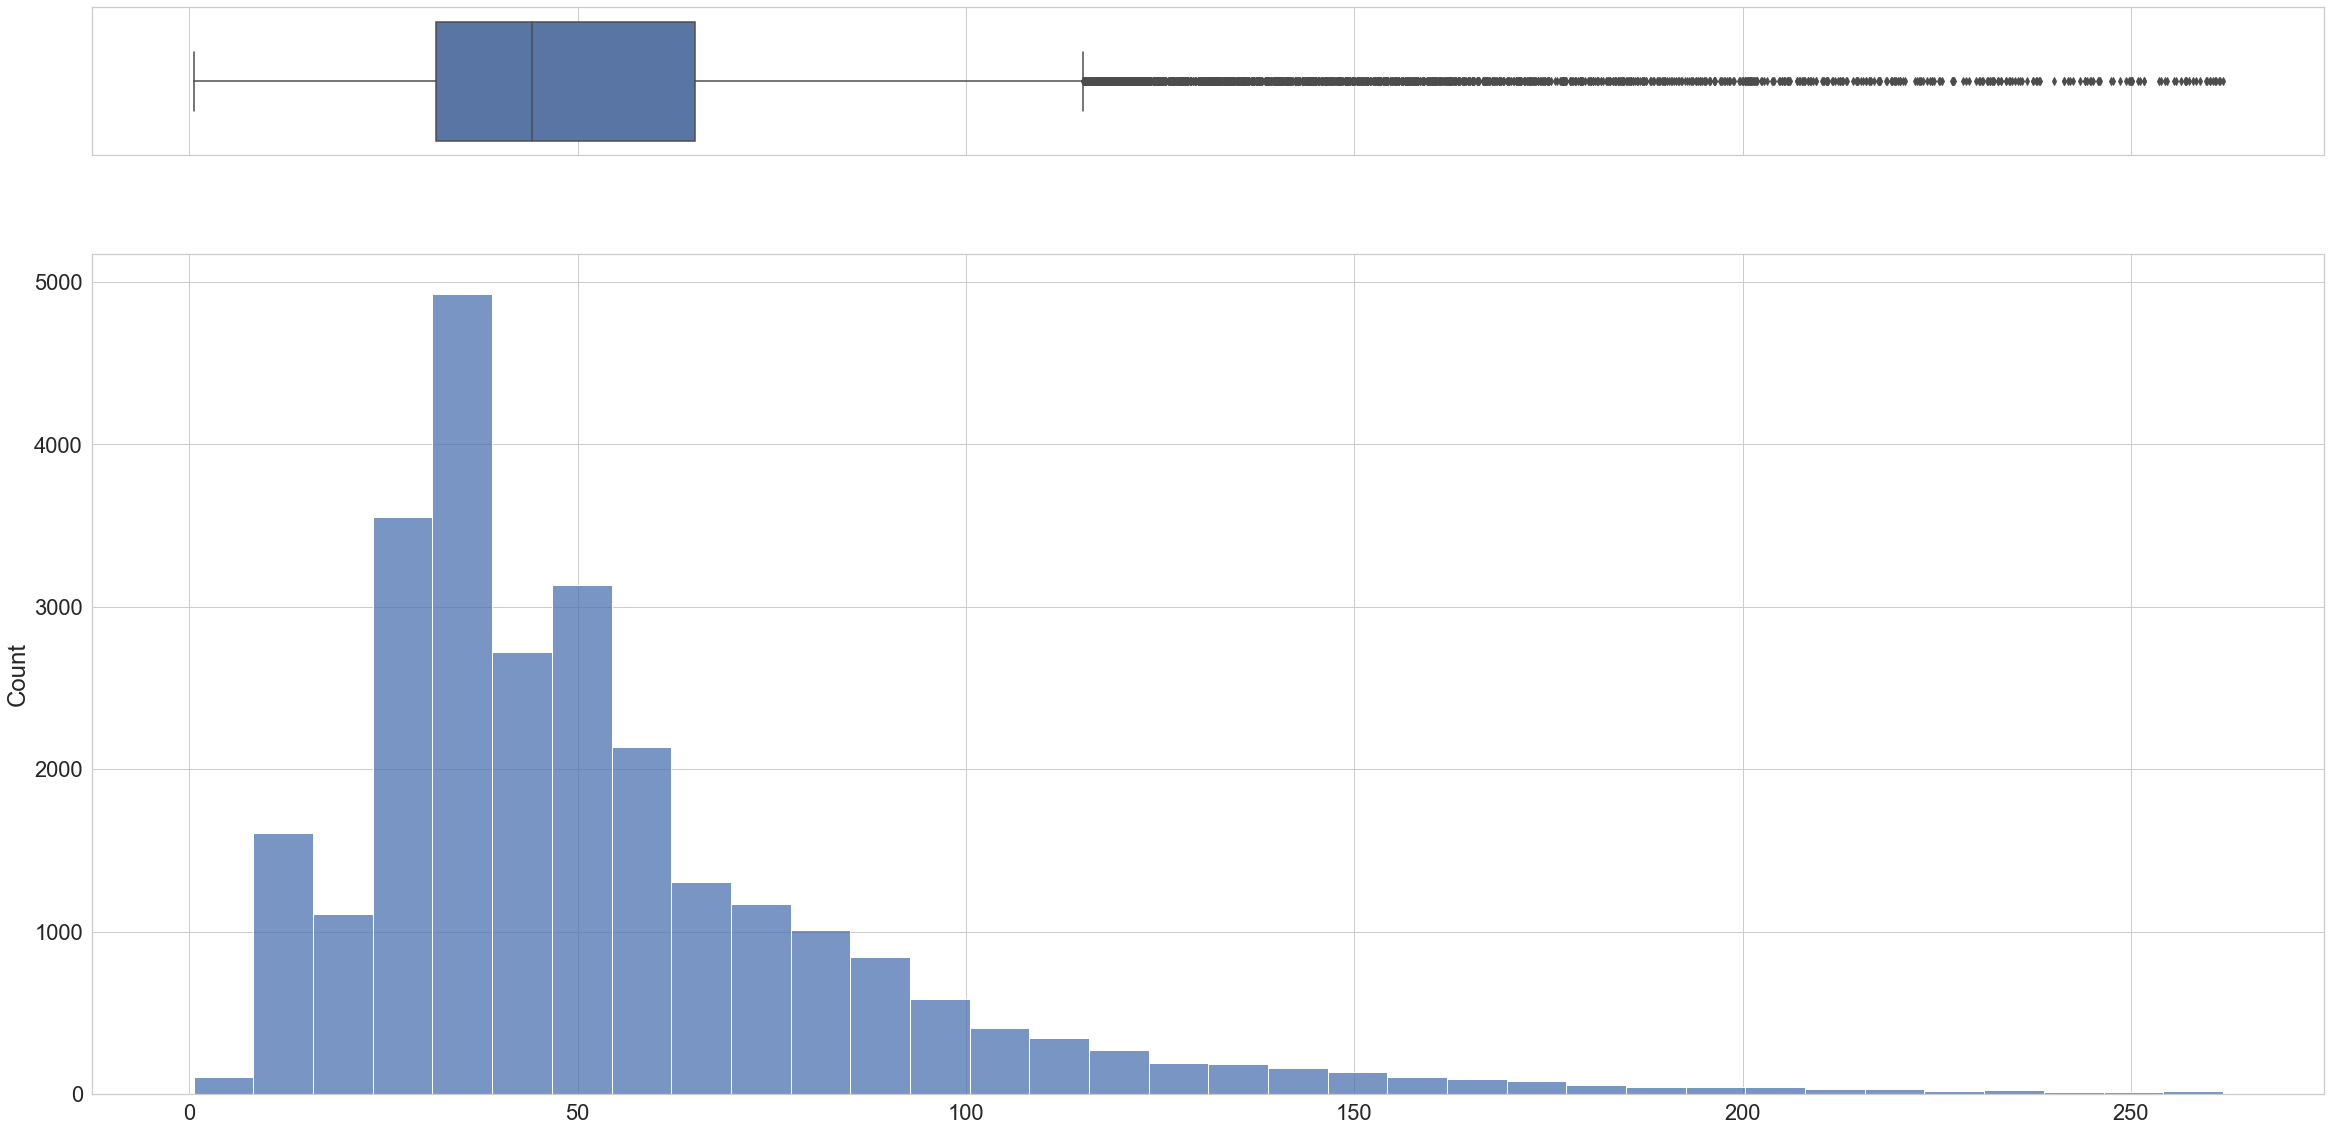

MM (20.649095579920793, 1.800032399586864, 0.20972521234142966, 29.480787679229053, 13.572992662803202, 0.6480164472384253, 66.45477007012002, 30.229992453398566, -0.003425547046878347, 1.5987661398578985)


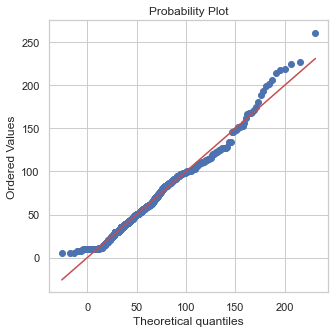

KstestResult(statistic=0.035190038426624104, pvalue=0.16403478000987493)
CramerVonMisesResult(statistic=0.13278356380721246, pvalue=0.44664007031469743)


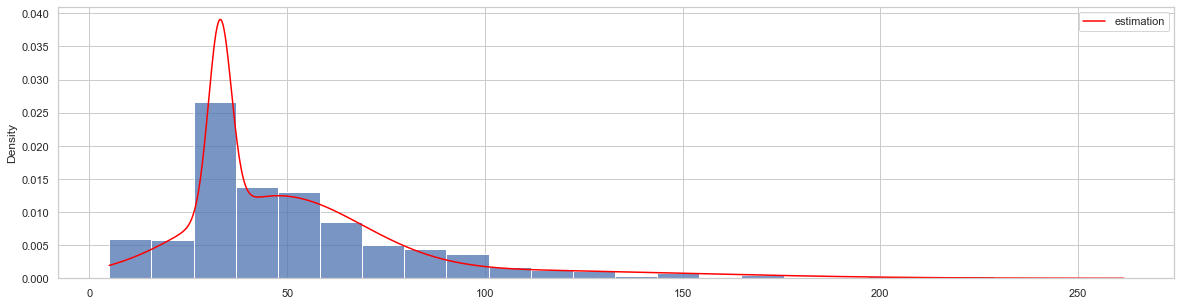

In [591]:
data = prepare_data(df=df, feature='rev_Mean', left_quanlile = 0.0, right_quanlile = 0.005)
describe_data(data)
describe_distribution(data, tri_modal, params=[18, 3, 0.2, 30, 10, 0.65, 55, 25], k=1000)

## 'mou_Mean' - Mean number of monthly minutes of use

                 0
count 26653.000000
mean    446.683868
std     454.920986
min       0.000000
25%     134.500000
50%     305.500000
75%     601.000000
max    3549.250000


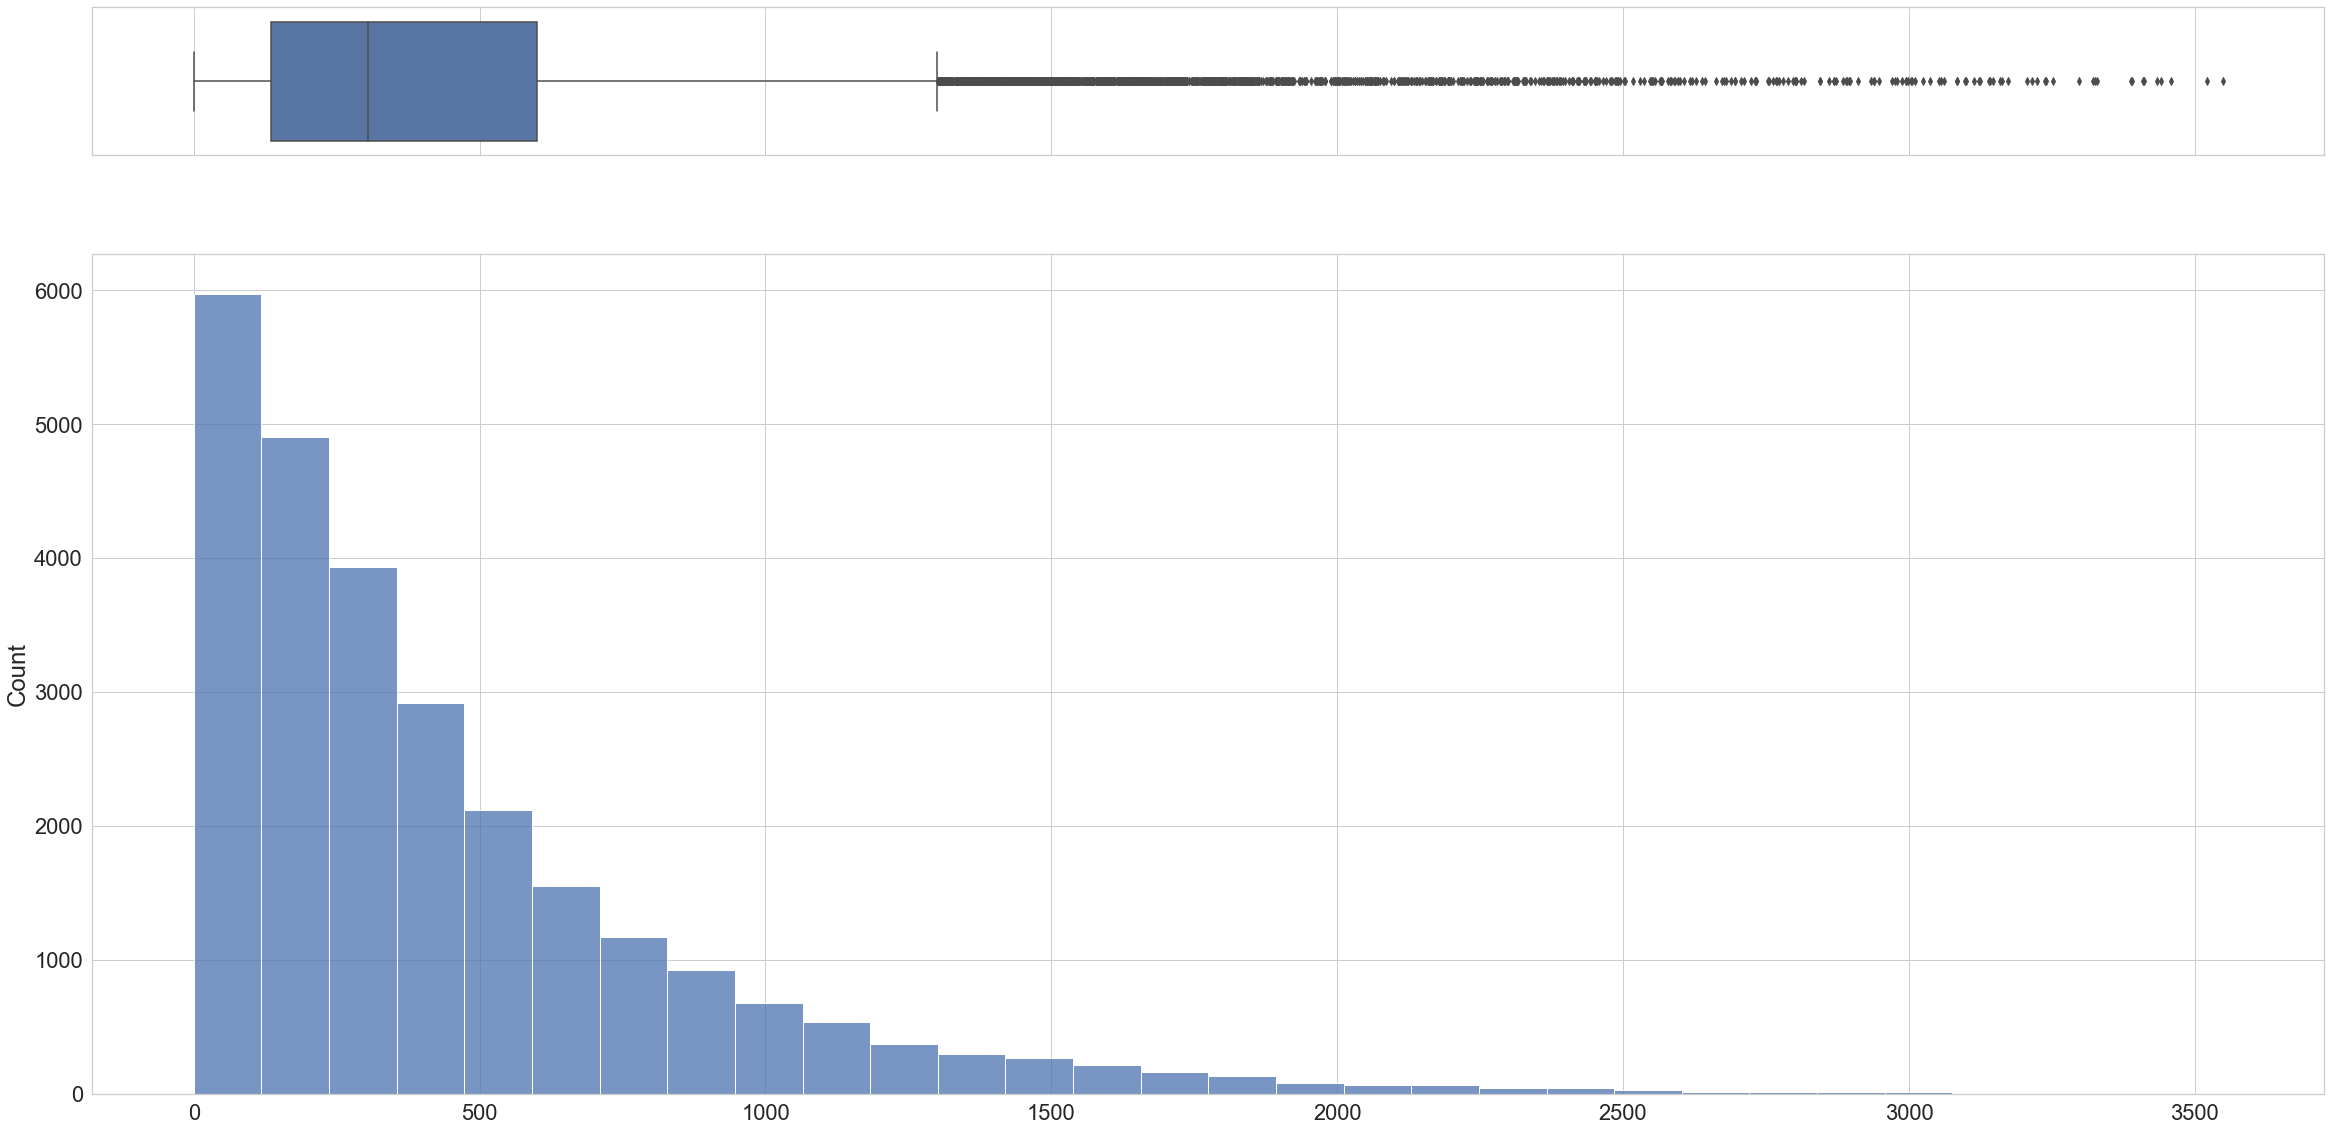

MM (0.0, 450.2675500000134)


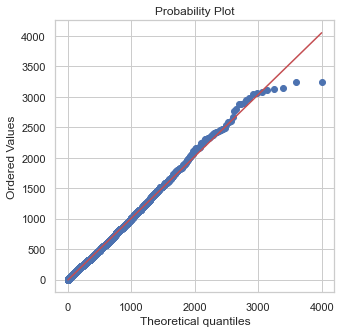

MLE (0.0, 450.2675500000134)
KstestResult(statistic=0.02191950587695224, pvalue=0.016140645541716767)
CramerVonMisesResult(statistic=0.5965054114124763, pvalue=0.022828204114992756)


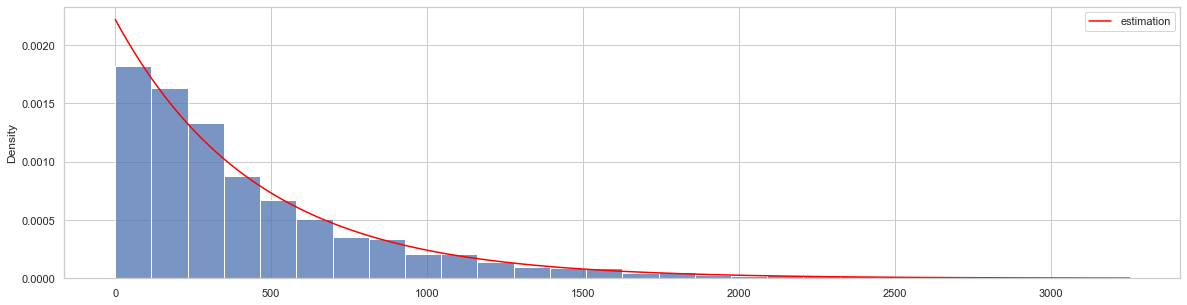

In [586]:
data = prepare_data(df=df, feature='mou_Mean')
describe_data(data)
describe_distribution(data, expon)

                 0
count 24102.000000
mean     -8.732036
std     107.299596
min    -325.500000
25%     -61.750000
50%      -4.750000
75%      45.500000
max     291.000000


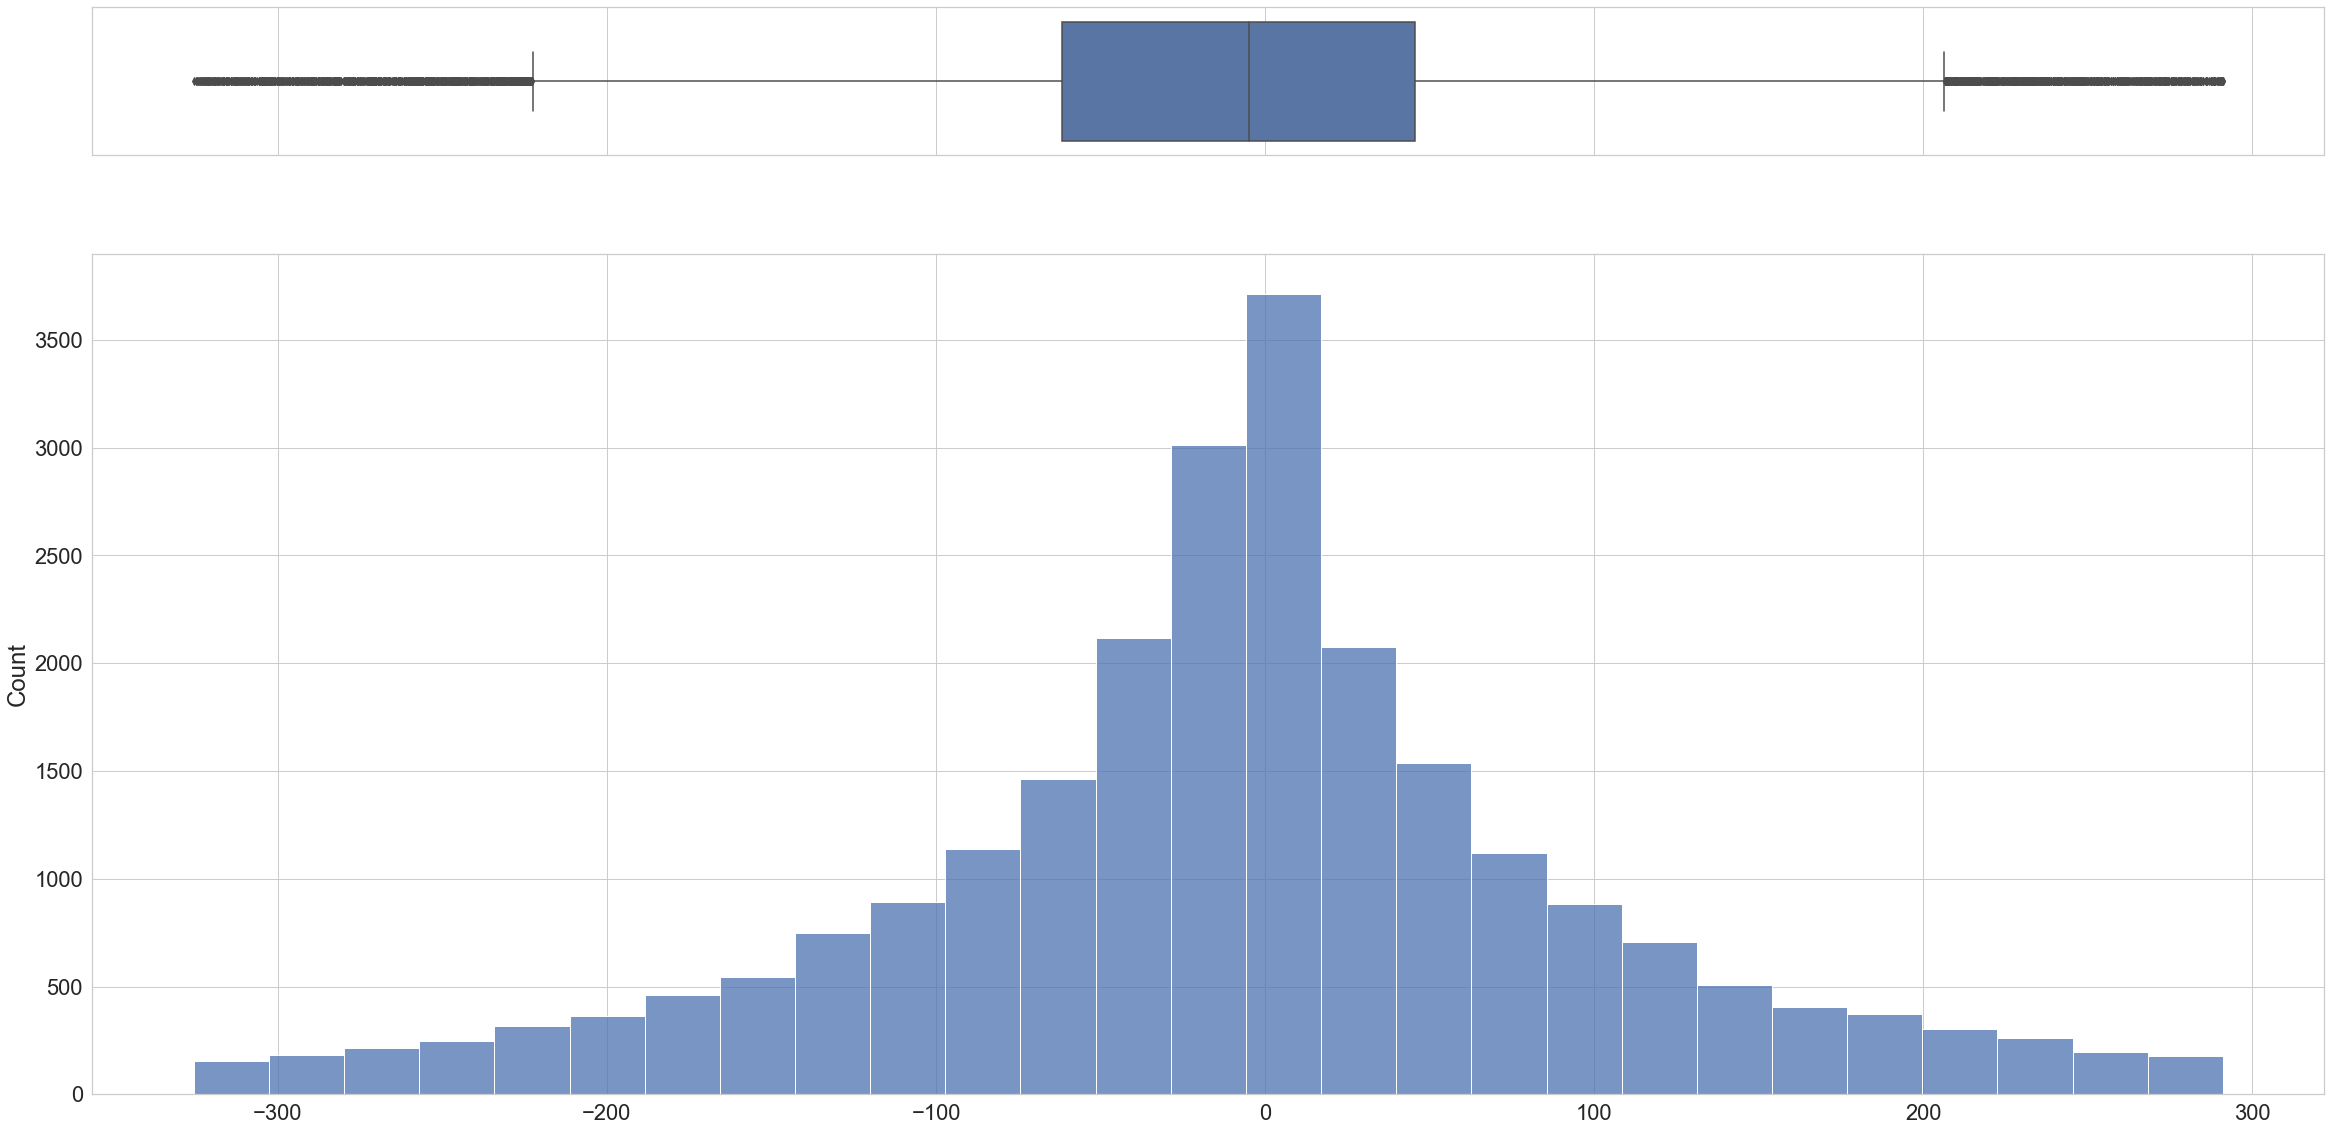

MM (1.0216634951637558, -5.387515456277442, 78.1229405754147)


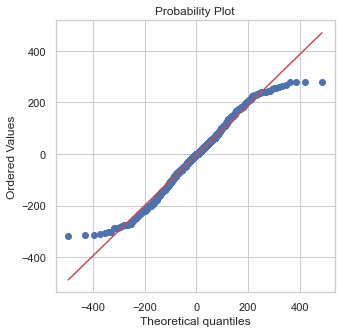

MLE (1.0216634951637558, -5.387515456277442, 78.1229405754147)
KstestResult(statistic=0.03169971959097373, pvalue=0.2618488524086564)
CramerVonMisesResult(statistic=0.16392352760101603, pvalue=0.3498461221029663)


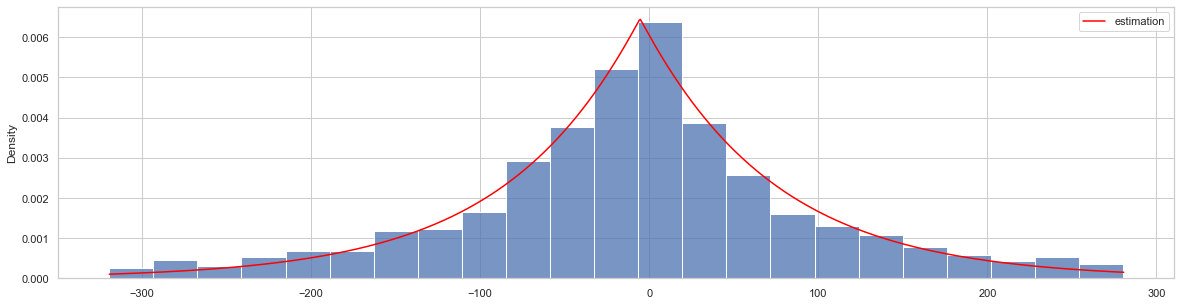

In [587]:
data = prepare_data(df=df, feature='change_mou', left_quanlile = 0.05, right_quanlile = 0.05)
# find_distribution(data)
describe_data(data)
describe_distribution(data, gennorm, k=1000)

                 0
count 22834.000000
mean      0.414001
std       0.968425
min       0.000000
25%       0.000000
50%       0.000000
75%       0.257500
max       5.672500


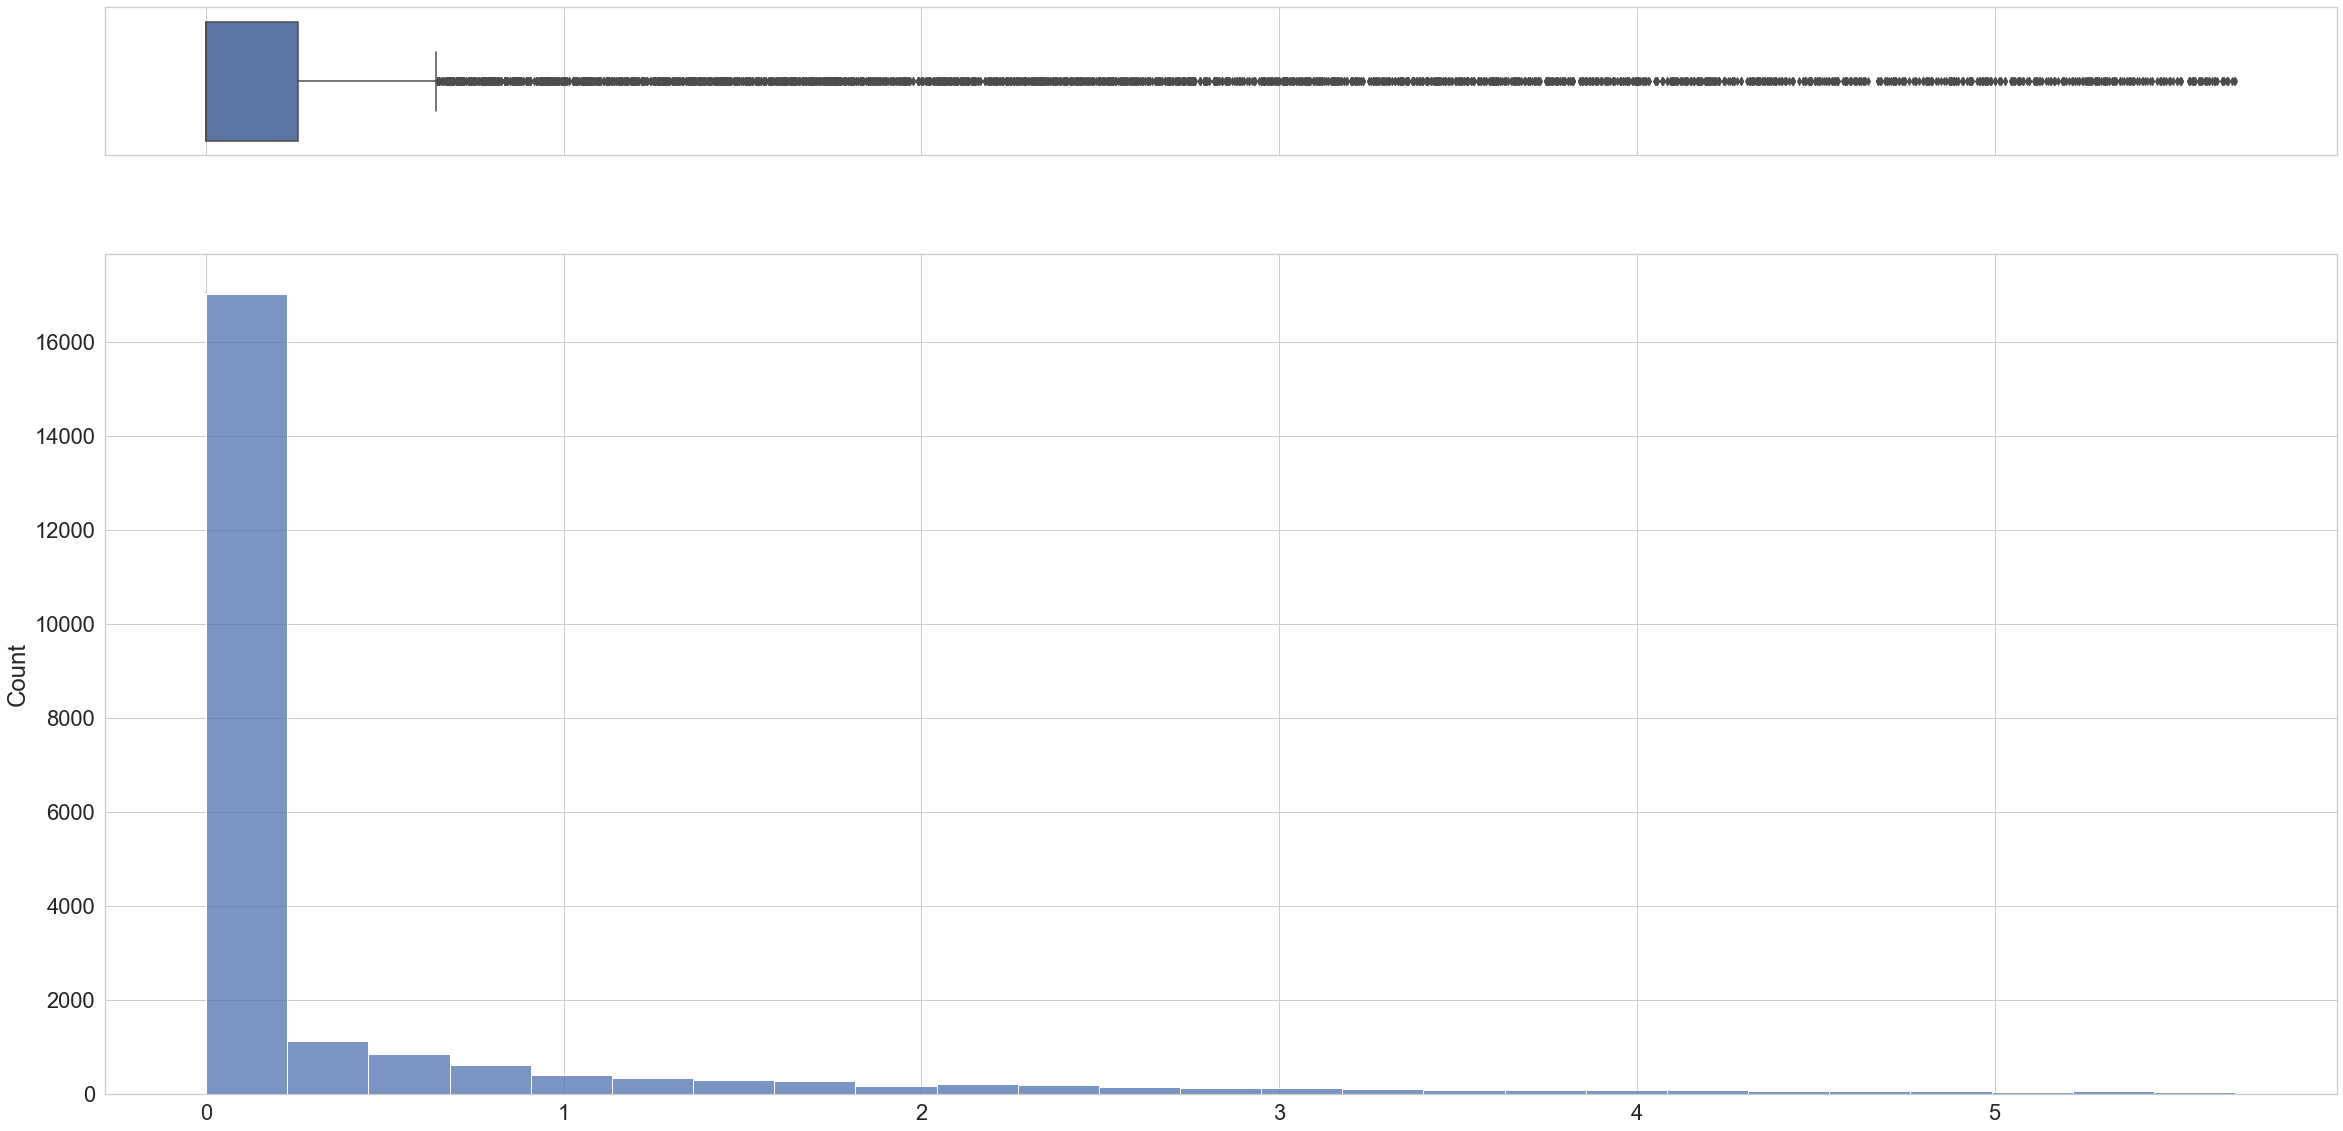

MM (0.0, 0.40506758333320003)


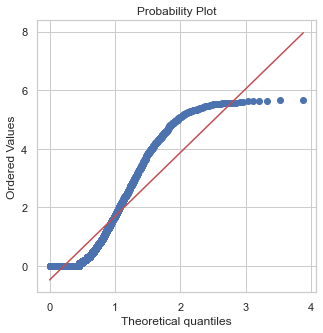

MLE (0.0, 0.40506758333320003)
KstestResult(statistic=0.6727, pvalue=0.0)
CramerVonMisesResult(statistic=1185.8892889862825, pvalue=2.3080460209712328e-07)


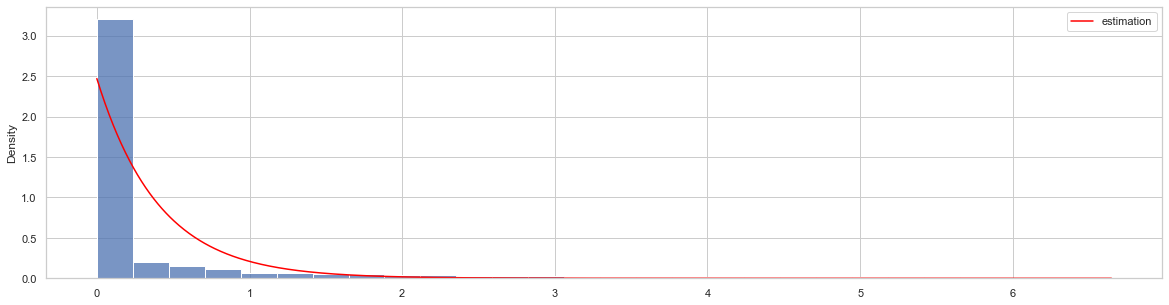

In [589]:
data = prepare_data(df=df, feature='roam_Mean', left_quanlile = 0.1, right_quanlile = 0.05)
describe_data(data)
# find_distribution(data)
describe_distribution(data, expon, k=10000)